In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\user\Downloads\kc_house_data.csv')


if df.shape[1] == 1:
    
    df = df.iloc[:, 0].str.split(',', expand=True)
    
   
    column_names = [
        'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 
        'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
        'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 
        'lat', 'long', 'sqft_living15', 'sqft_lot15'
    ]
    
    
    df.columns = column_names


numeric_cols = [
    'id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
    'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 
    'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
    'sqft_living15', 'sqft_lot15'
]

converted_cols = []
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        converted_cols.append(col)
        print(f"   ✓ {col}")

print(f"\n   Преобразовано {len(converted_cols)} числовых колонок")

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 150)
pd.options.display.float_format = '{:,.2f}'.format


print(f"Всего записей: {len(df)}")
print(f"Колонки: {', '.join(df.columns.tolist())}")
print("="*120 + "\n")


print("Первые 30 строк таблицы:")
print(df.head(30).to_string())




   ✓ id
   ✓ price
   ✓ bedrooms
   ✓ bathrooms
   ✓ sqft_living
   ✓ sqft_lot
   ✓ floors
   ✓ waterfront
   ✓ view
   ✓ condition
   ✓ grade
   ✓ sqft_above
   ✓ sqft_basement
   ✓ yr_built
   ✓ yr_renovated
   ✓ zipcode
   ✓ lat
   ✓ long
   ✓ sqft_living15
   ✓ sqft_lot15

   Преобразовано 20 числовых колонок
Всего записей: 21613
Колонки: id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15

Первые 30 строк таблицы:
            id               date        price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15
0   7129300520  "20141013T000000"   221,900.00         3       1.00         1180      5650     NaN           0     0          3      7        1180              0      1955             0      

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


print("\n1. Подготовка данных...")


if "df" not in locals():
    raise ValueError("df не определен. Сначала загрузите данные в DataFrame 'df'.")


default_numeric = ["price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot"]

if "numeric_cols" not in locals():
    numeric_cols = default_numeric.copy()
else:
    
    if not numeric_cols:
        numeric_cols = default_numeric.copy()


numeric_cols = [c for c in numeric_cols if c in df.columns]

if not numeric_cols:
    raise ValueError("В df нет ни одной из ожидаемых числовых колонок.")

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")


df = df.dropna(subset=["price"])         
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())  

df_clean = df[numeric_cols].copy()
print(f"Данных осталось: {len(df_clean)} строк")

if len(df_clean) < 2:
    raise ValueError("Слишком мало данных после очистки. Нужны хотя бы 2 строки.")


print("\n2. Выбор признаков...")


available_cols = list(df_clean.columns)


price_col = None
for col in available_cols:
    if "price" in col.lower():
        price_col = col
        break

if price_col is None:
    price_col = available_cols[-1]
    print(f"Колонка 'price' не найдена,'{price_col}' как целевая")

print(f"Целевая переменная: {price_col}")

feature_cols = [c for c in available_cols if c != price_col]
if len(feature_cols) > 5:
    feature_cols = feature_cols[:5]

print(f"   Признаки: {feature_cols}")


print("\n3. Подготовка X и y...")
X = df_clean[feature_cols].to_numpy()
y = df_clean[price_col].to_numpy()

print(f"   X размер: {X.shape}")
print(f"   y размер: {y.shape}")


print("\n4. Разделение данных...")

if len(y) >= 10:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    print("Данные разделены на train/test")
else:
    print(f"Мало данных ({len(y)} строк) — используем всё для обучения")
    X_train, y_train = X, y
    X_test, y_test = X.copy(), y.copy()


1. Подготовка данных...
Данных осталось: 21613 строк

2. Выбор признаков...
Целевая переменная: price
   Признаки: ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']

3. Подготовка X и y...
   X размер: (21613, 5)
   y размер: (21613,)

4. Разделение данных...
Данные разделены на train/test


In [21]:
print(f"Размер: {df.shape[0]} строк × {df.shape[1]} колонок")
print(f"\nТипы данных:")
print(df.dtypes)
print(f"\nПропущенные значения:")
print(df.isnull().sum())

Размер: 21613 строк × 21 колонок

Типы данных:
id               object
date             object
price            object
bedrooms         object
bathrooms        object
sqft_living      object
sqft_lot         object
floors           object
waterfront       object
view             object
condition        object
grade            object
sqft_above       object
sqft_basement    object
yr_built         object
yr_renovated     object
zipcode          object
lat              object
long             object
sqft_living15    object
sqft_lot15       object
dtype: object

Пропущенные значения:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [22]:
df.head

<bound method NDFrame.head of                id               date   price bedrooms bathrooms sqft_living sqft_lot floors waterfront view condition grade sqft_above  \
0      7129300520  "20141013T000000"  221900        3         1        1180     5650    "1"          0    0         3     7       1180   
1      6414100192  "20141209T000000"  538000        3      2.25        2570     7242    "2"          0    0         3     7       2170   
2      5631500400  "20150225T000000"  180000        2         1         770    10000    "1"          0    0         3     6        770   
3      2487200875  "20141209T000000"  604000        4         3        1960     5000    "1"          0    0         5     7       1050   
4      1954400510  "20150218T000000"  510000        3         2        1680     8080    "1"          0    0         3     8       1680   
...           ...                ...     ...      ...       ...         ...      ...    ...        ...  ...       ...   ...        ...   
2160

In [23]:
for col in df.columns:
    if col != 'date':  # дату оставляем как есть
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            print(f"✓ Преобразована колонка: {col}")
        except:
            print(f"✗ Не удалось преобразовать колонку: {col}")

print("\nПосле преобразования типов данных:")
print(df.dtypes)

✓ Преобразована колонка: id
✓ Преобразована колонка: price
✓ Преобразована колонка: bedrooms
✓ Преобразована колонка: bathrooms
✓ Преобразована колонка: sqft_living
✓ Преобразована колонка: sqft_lot
✓ Преобразована колонка: floors
✓ Преобразована колонка: waterfront
✓ Преобразована колонка: view
✓ Преобразована колонка: condition
✓ Преобразована колонка: grade
✓ Преобразована колонка: sqft_above
✓ Преобразована колонка: sqft_basement
✓ Преобразована колонка: yr_built
✓ Преобразована колонка: yr_renovated
✓ Преобразована колонка: zipcode
✓ Преобразована колонка: lat
✓ Преобразована колонка: long
✓ Преобразована колонка: sqft_living15
✓ Преобразована колонка: sqft_lot15

После преобразования типов данных:
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade       

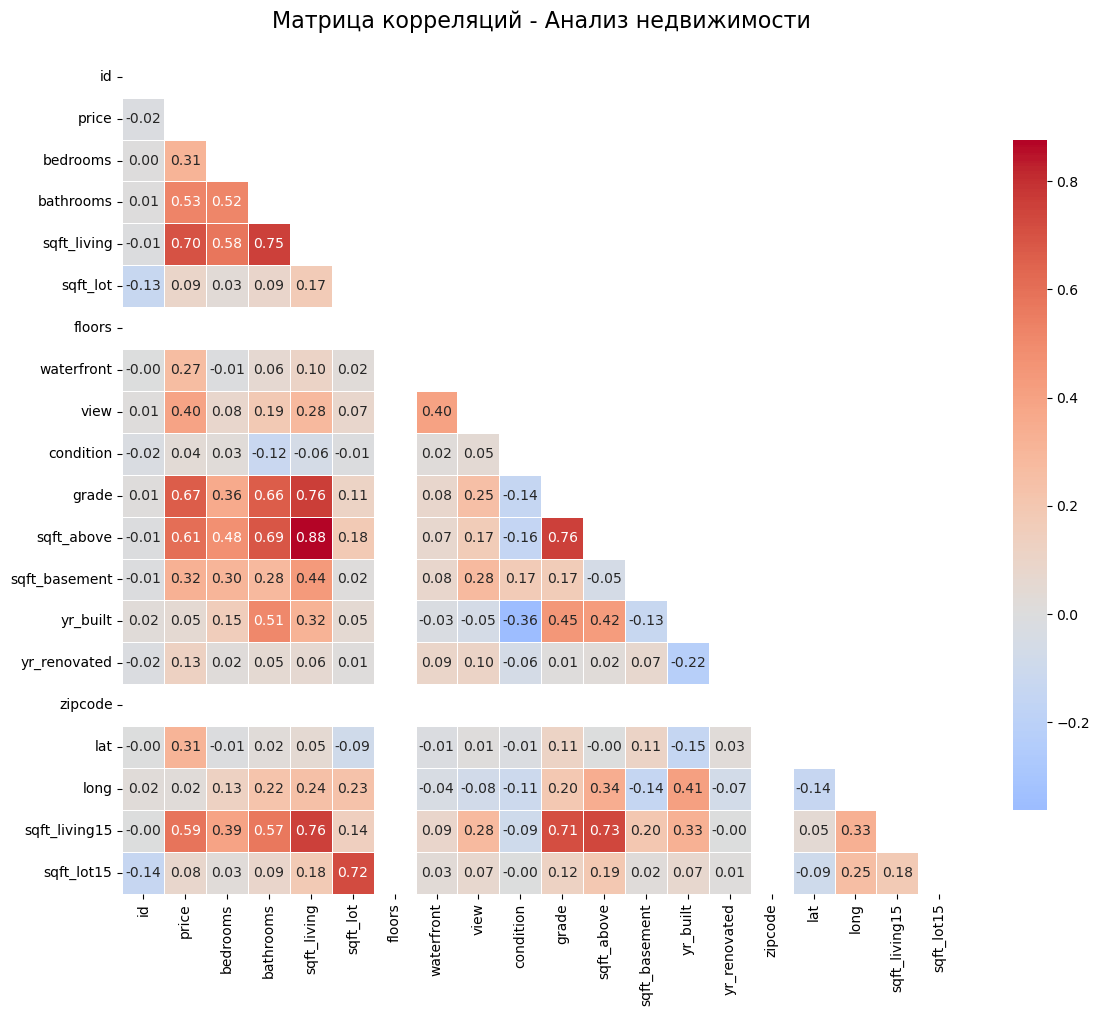


Матрица корреляций:
                 id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
id             1.00  -0.02      0.00       0.01        -0.01     -0.13     NaN       -0.00  0.01      -0.02   0.01       -0.01          -0.01   
price         -0.02   1.00      0.31       0.53         0.70      0.09     NaN        0.27  0.40       0.04   0.67        0.61           0.32   
bedrooms       0.00   0.31      1.00       0.52         0.58      0.03     NaN       -0.01  0.08       0.03   0.36        0.48           0.30   
bathrooms      0.01   0.53      0.52       1.00         0.75      0.09     NaN        0.06  0.19      -0.12   0.66        0.69           0.28   
sqft_living   -0.01   0.70      0.58       0.75         1.00      0.17     NaN        0.10  0.28      -0.06   0.76        0.88           0.44   
sqft_lot      -0.13   0.09      0.03       0.09         0.17      1.00     NaN        0.02  0.07      -0.01  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,"""20141013T000000""","221,900.00",3,1.00,1180,5650,NaN,0,0,3,7,1180,0,1955,0,NaN,47.51,-122.26,1340,5650
1,6414100192,"""20141209T000000""","538,000.00",3,2.25,2570,7242,NaN,0,0,3,7,2170,400,1951,1991,NaN,47.72,-122.32,1690,7639
2,5631500400,"""20150225T000000""","180,000.00",2,1.00,770,10000,NaN,0,0,3,6,770,0,1933,0,NaN,47.74,-122.23,2720,8062
3,2487200875,"""20141209T000000""","604,000.00",4,3.00,1960,5000,NaN,0,0,5,7,1050,910,1965,0,NaN,47.52,-122.39,1360,5000
4,1954400510,"""20150218T000000""","510,000.00",3,2.00,1680,8080,NaN,0,0,3,8,1680,0,1987,0,NaN,47.62,-122.05,1800,7503


In [24]:


numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .8})

plt.title('Матрица корреляций - Анализ недвижимости', fontsize=16, pad=20)
plt.tight_layout()
plt.show()


print("\nМатрица корреляций:")
print(corr_matrix)

df.head()